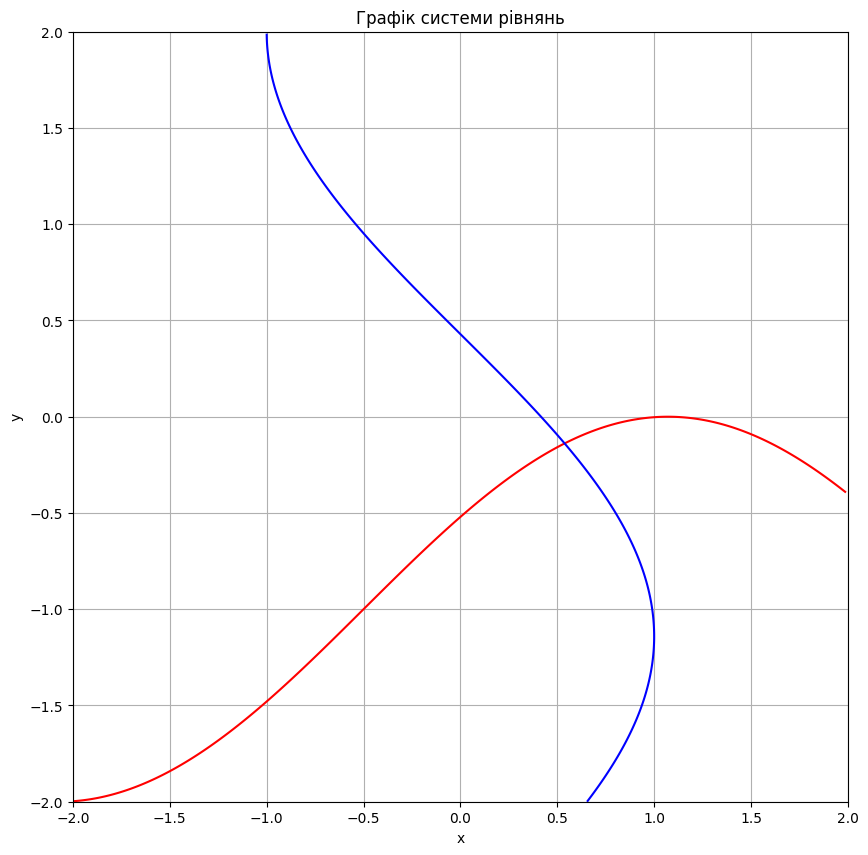

Simple iteration:
x = 0.5373787236662524 
y = -0.13901747696962263 
The amount of iteration = 18
Check: [ 0.537853   -0.13868462]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Область значень для x та y
x_min, x_max = -2, 2
y_min, y_max = -2, 2
step = 0.01

# Створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step),
                   np.arange(y_min, y_max, step))

# Рівняння системи
eq1 = np.sin(x + 0.5) - y - 1
eq2 = np.cos(y - 2) + x

# Створюємо графік
fig, ax = plt.subplots(figsize=(10, 10))

# Додаємо графік першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# Додаємо графік другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# Налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')
plt.grid(True)

# Показуємо графік
plt.show()


# Розв'язок системи рівнянь методом простої ітерації
x0 = 0.3
y0 = -0.1
delta = 0.1

def f1(y):
    return np.sin(y + 0.5) - 1

def f2(x):
    return -np.cos(x - 2)

def iter(x, y, e):
    xn = x
    yn = y
    xn1 = f2(x)
    yn1 = f1(y)
    n = 1
    while ((abs(xn1 - xn) >= e) and (abs(yn1 - yn) >= e)):
        xn = xn1
        yn = yn1
        xn1 = f2(yn)
        yn1 = f1(xn)
        n += 1
    print('Simple iteration:')
    print('x =', xn, '\ny =', yn, '\nThe amount of iteration =', n)

iter(x0, y0, 0.0001)

# Перевірка розв'язку методом optimize.root з бібліотеки SciPy
def f3(x):
    return [np.sin(x[0] + 0.5) - x[1] - 1, np.cos(x[1] - 2) + x[0]]

s = optimize.root(f3, [0., 0.], method='hybr')
print('Check:', s.x)
